In [3]:
# https://wellcome.ac.uk/reports/wellcome-global-monitor/2018

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

df = pd.read_csv('data/survey/all.csv')
df.head()

,Country,Question,Response,Column N %
0,Afghanistan,"Q1 How much do you, personally, know about sci...",A lot,0.024561
1,Afghanistan,"Q1 How much do you, personally, know about sci...",Some,0.337138
2,Afghanistan,"Q1 How much do you, personally, know about sci...",Not much,0.309527
3,Afghanistan,"Q1 How much do you, personally, know about sci...",Nothing at all,0.292751
4,Afghanistan,"Q1 How much do you, personally, know about sci...",(DK),0.036023


In [4]:
#for i in df['Question'].unique():
#    print(i+'\n')

In [5]:
#Clean names
whr_names = {'Bosnia and Herzegovina': 'Bosnia and Herz.',
            'Congo, Rep.' : 'Dem. Rep. Congo',
            'Czech Republic' : 'Czech Rep.',
            'Dominican Republic' : 'Dominican Rep.',
            'Ivory Coast':"Côte d'Ivoire", 
            'Northern Cyprus' : 'N. Cyprus',
            'South Korea' : 'Korea',
            'Laos': 'Lao PDR',
            'The Gambia': 'Gambia',
            'Eswatini': 'Swaziland'}

for name, clean_name in whr_names.items():
    df['Country'].loc[df.Country == name] = [clean_name]*len(df['Country'].loc[df.Country == name])

C:\Users\thiag\.conda\envs\Training\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
def get_df(question):

    df_q = df[df['Question'] == question ]
    
    if( len(df_q[df_q['Response'] == 'A lot']) != 0):
        df_yes = df_q[df_q['Response'] == 'A lot']
        #print(len(df_yes))
        countries = df_yes.Country
        df_yes = df_yes['Column N %'] + df_q[df_q['Response'] == 'Some']['Column N %'].values
    else:
        df_yes = df_q[df_q['Response'] == 'Yes']
        countries = df_yes.Country
        df_yes = df_yes['Column N %']

    df_item = pd.DataFrame(countries.values)
    df_item.columns = ['Country']
    df_item['Total'] = df_yes.values

    return df_item

def plot_map(df_item, title, filename, vmin=0.5, vmax=1):
    # load maps and remove antarctic
    df_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    df_map = df_map[~df_map.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]

    # build a dataframe with the selected field
    #df_item = df_vac.filter(items=['Country','Agree']).copy()
    df_map = df_map.merge(df_item, how='left',left_on = 'name', right_on = 'Country')
    # set figure, axis and bg color
    fig, ax = plt.subplots(1,1,figsize=(40,18))
    fig.patch.set_facecolor('#85C1E9')

    # plot a background map
    df_map.plot(ax=ax, color='grey', alpha=0.3, edgecolor='0.2')

    # drop not listed countries and plot colormap
    df_map.dropna(inplace=True)
    df_map.plot(column='Total', cmap='RdYlGn', ax=ax, vmin=vmin, vmax=vmax)
    # title
    plt.title(title.upper(), fontsize='38')

    # set an axis for the color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    
    # color bar
    sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_yticklabels(['50%', '60%', '70%', '80%', '90%', '100%'])
    cbar.ax.tick_params(labelsize=28)
    # Adjust margins
    plt.subplots_adjust(left=0, right=0.95, top=1, bottom=0)
    
    # hide map axis
    ax.axis('off')
    plt.savefig(filename+'.png', facecolor=fig.get_facecolor(), edgecolor='none')

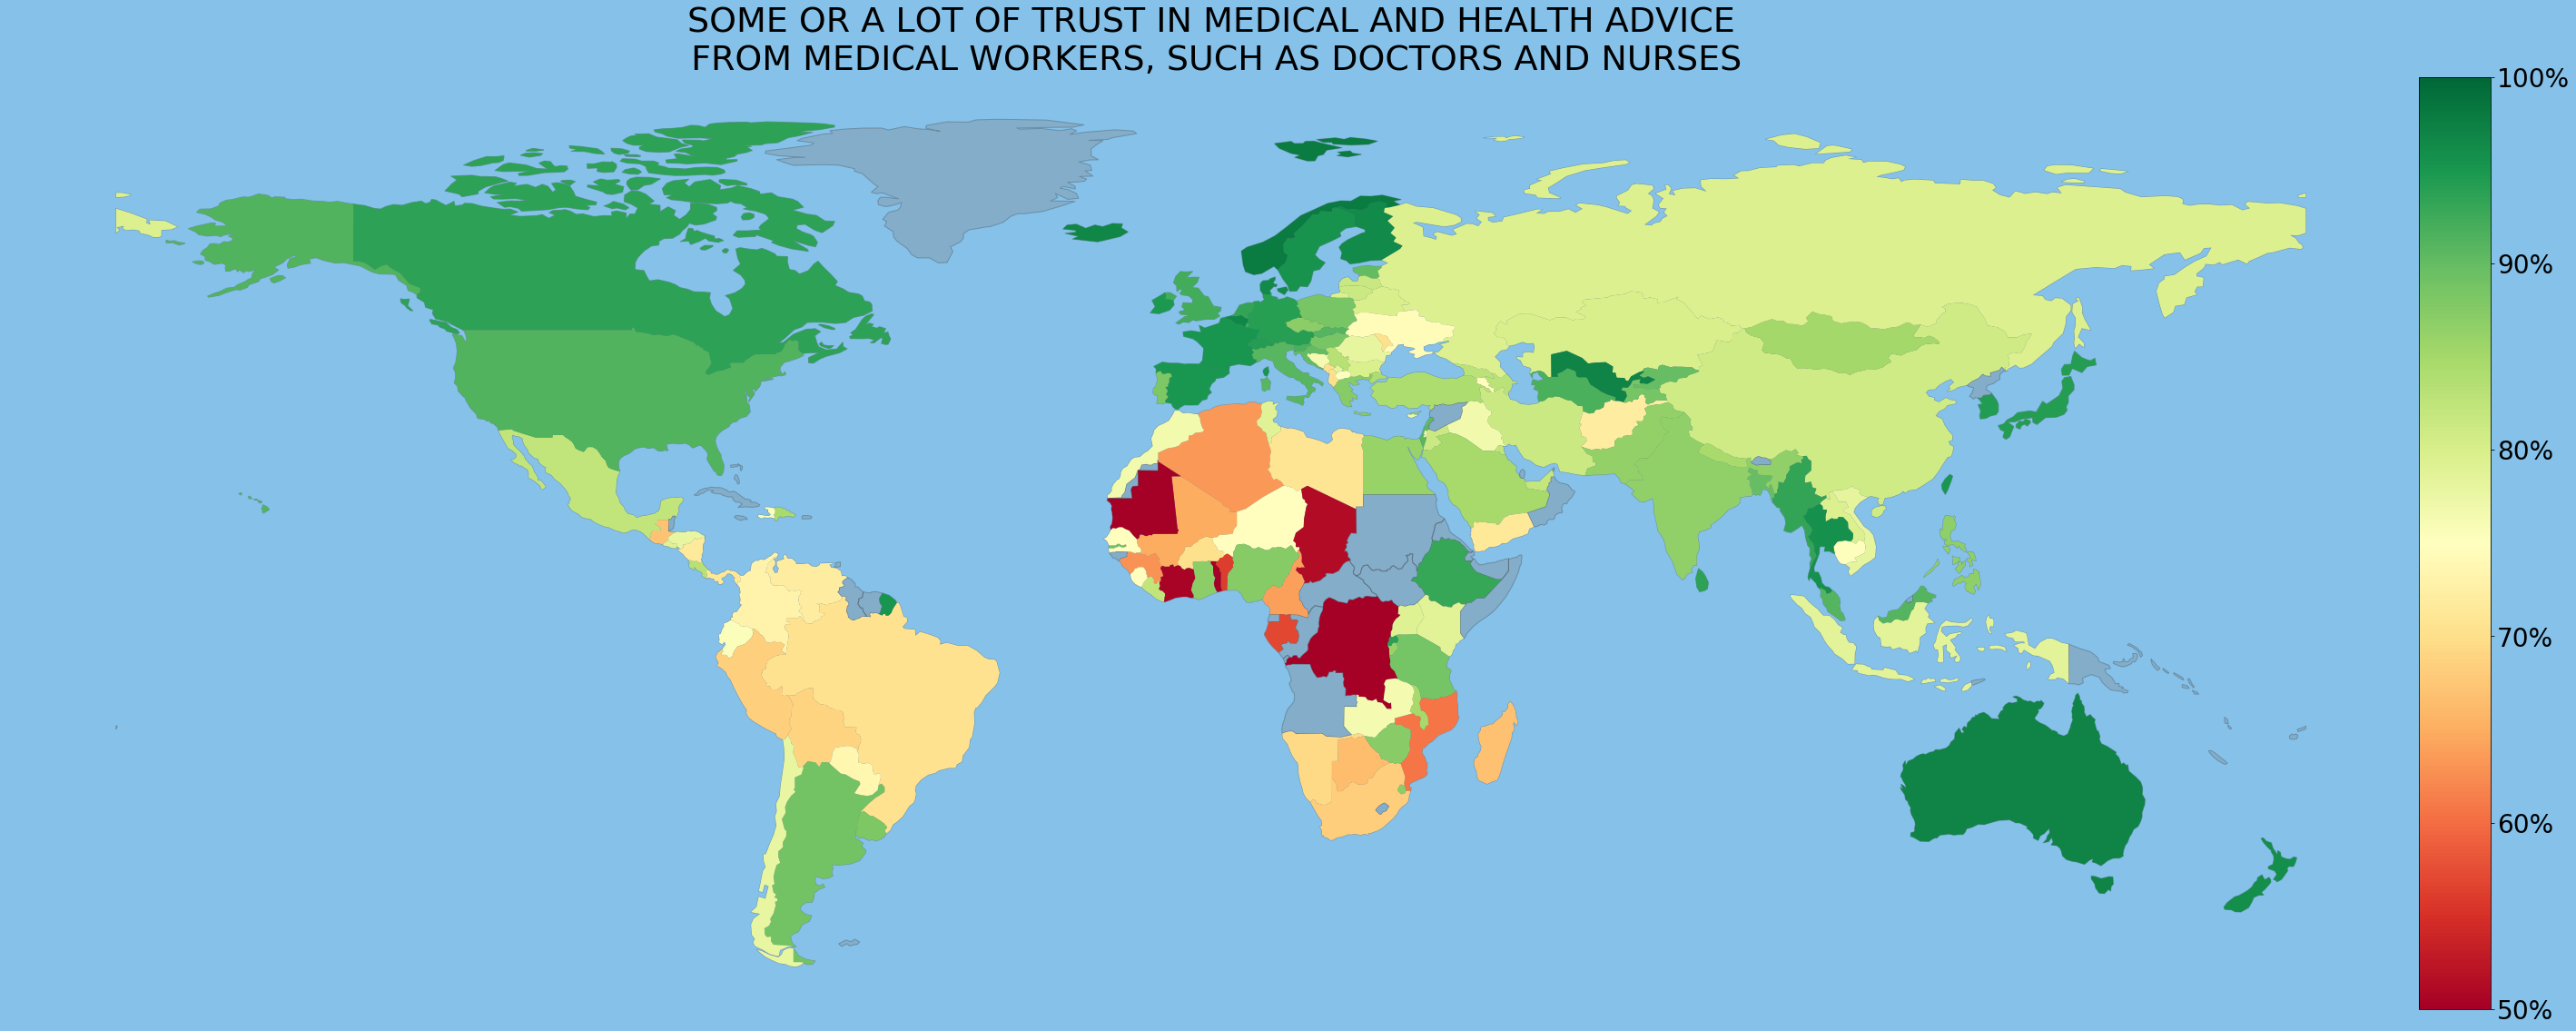

In [17]:
question = 'Q22 In general, how much do you trust medical and health advice from medical workers, such as doctors and nurses, in this country? A lot, some, not much, or not at all?'
title = 'Some or a lot of trust in medical and health advice\n from medical workers, such as doctors and nurses'
filename = 'medical_advice'

df_item = get_df(question)

plot_map(df_item, title, filename)

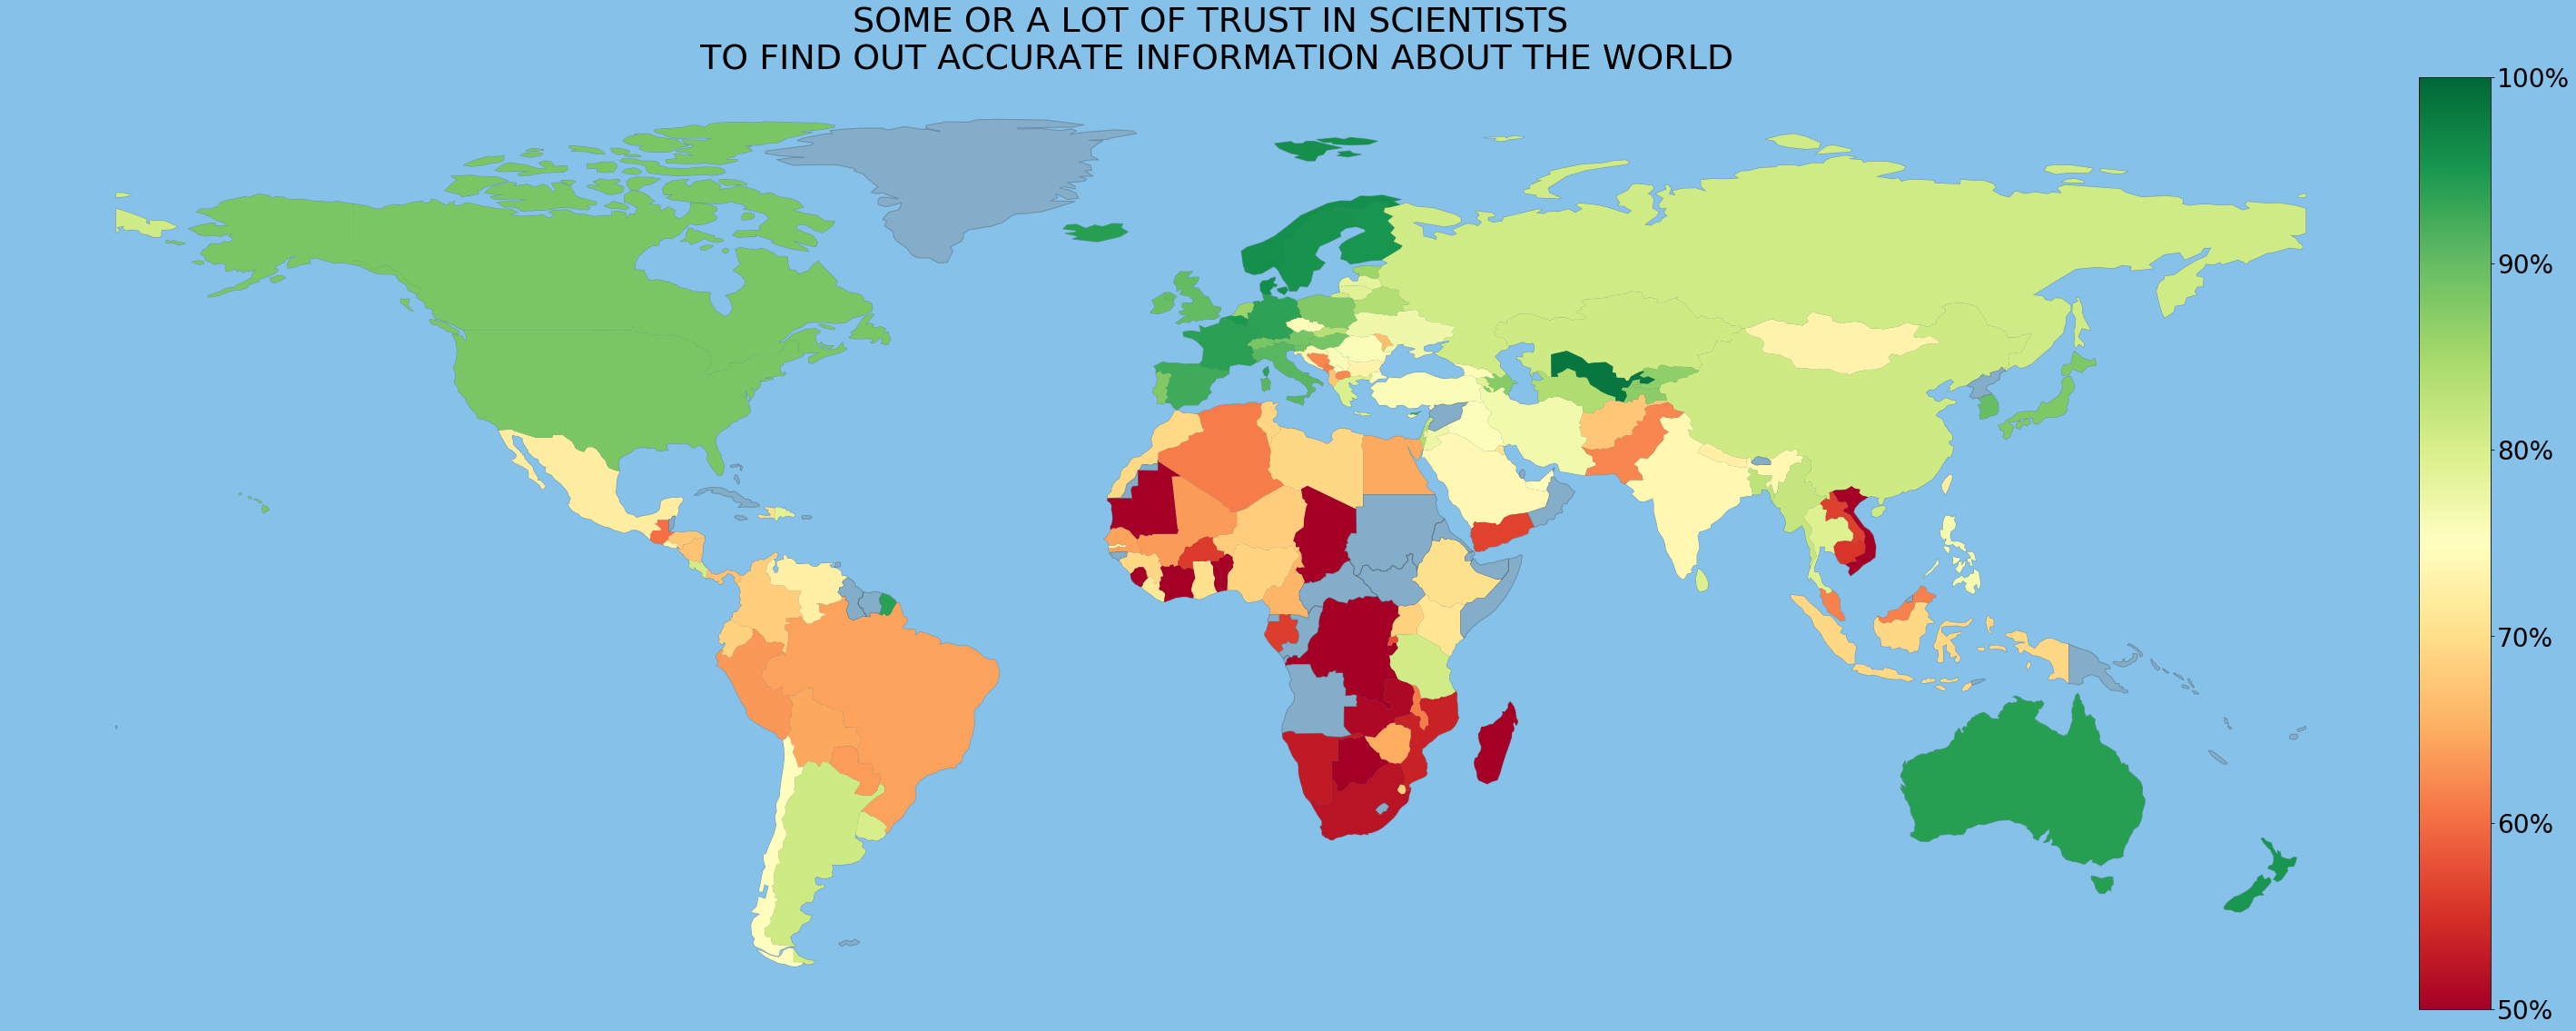

In [18]:
question = 'Q12 In general, would you say that you trust science a lot, some, not much, or not at all?'
title = 'Some or a lot of trust in scientists\n to find out accurate information about the world'
filename = 'trust_scientists'

df_item = get_df(question)

plot_map(df_item, title, filename)

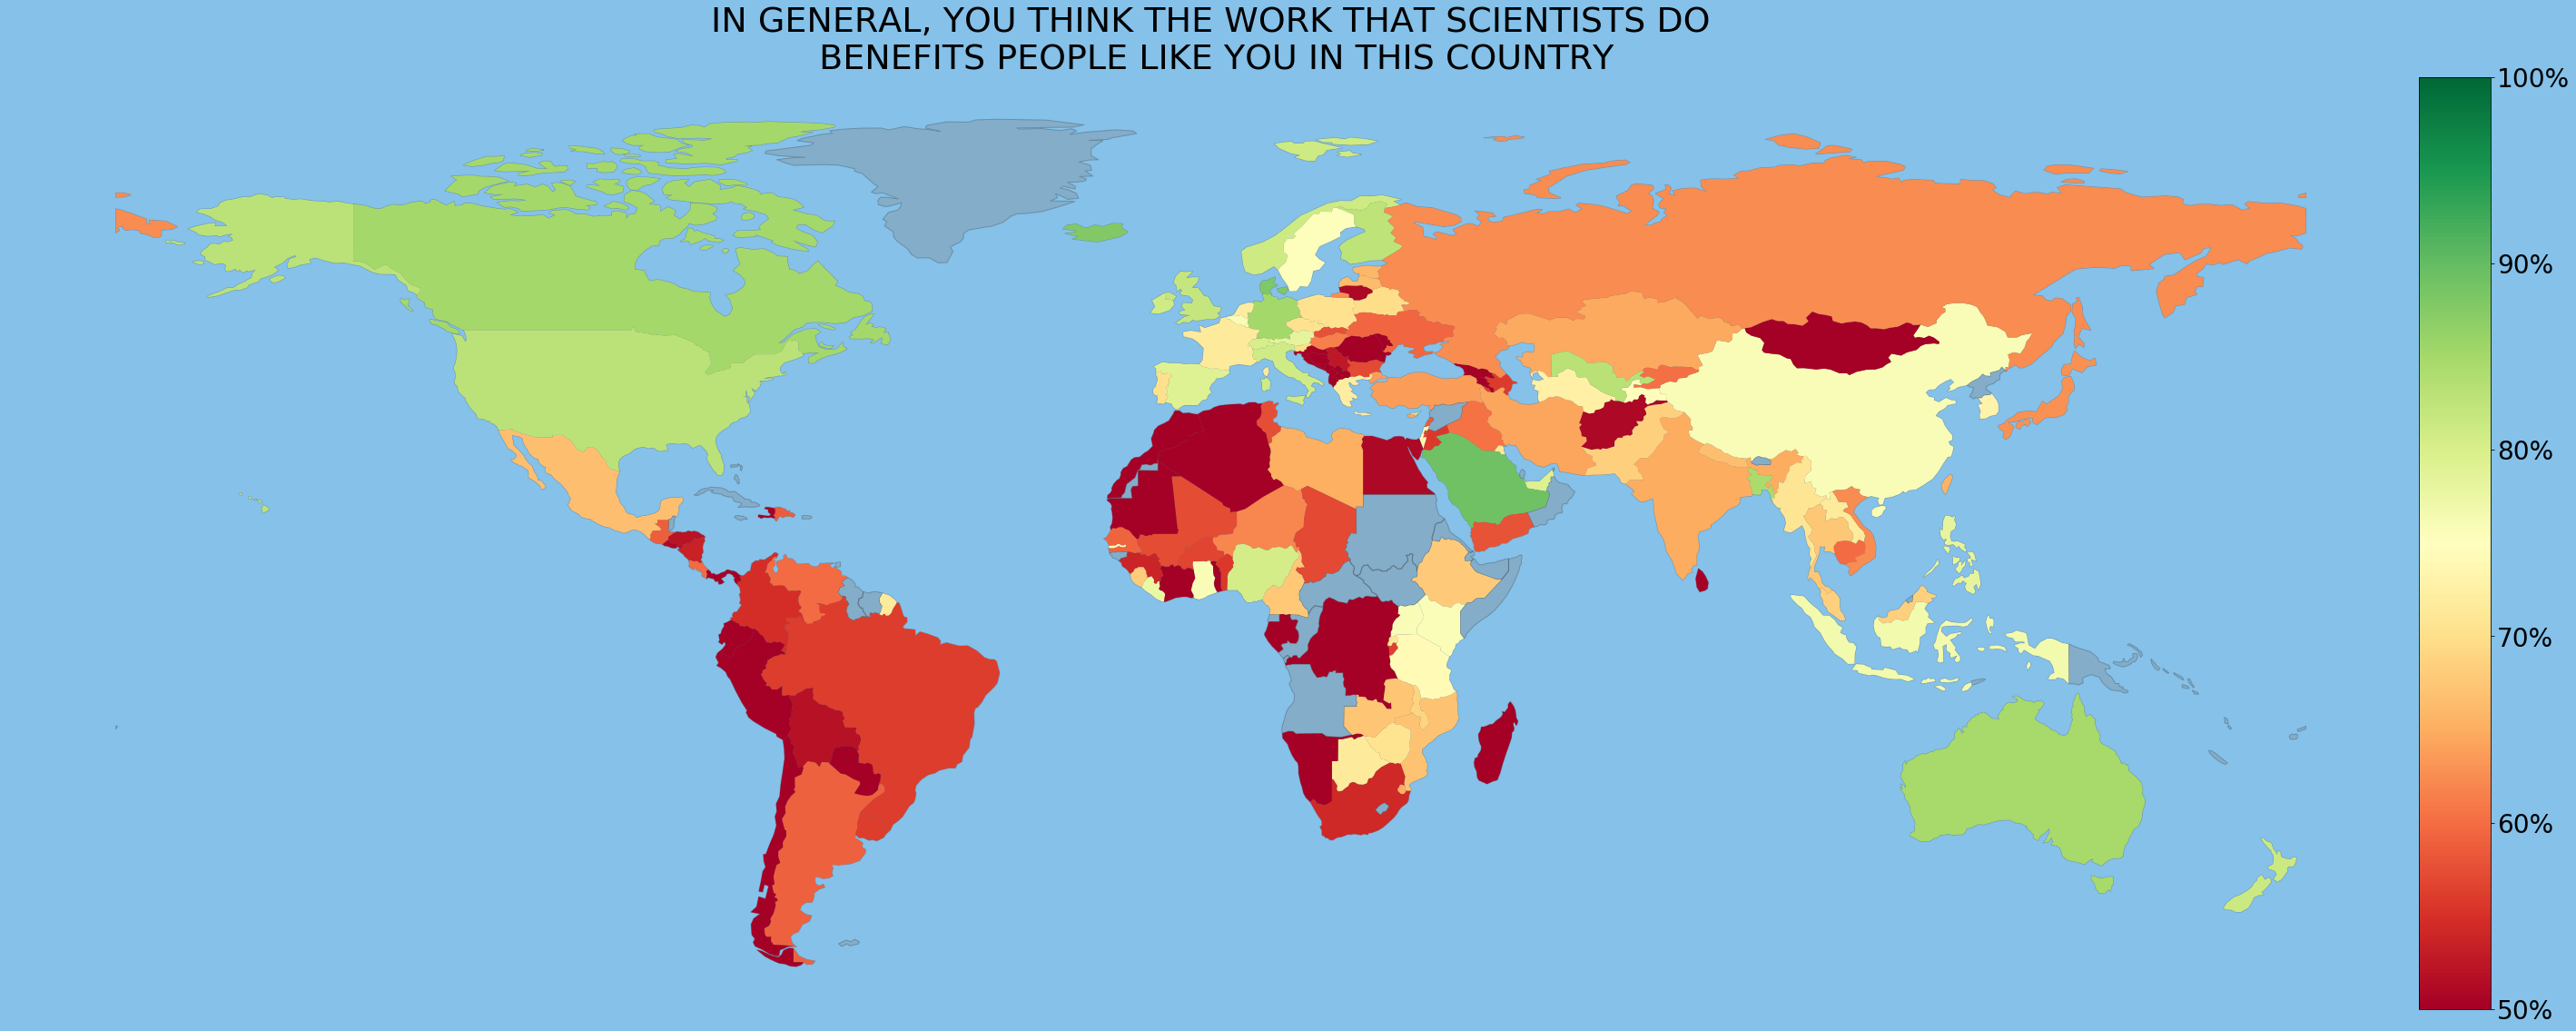

In [19]:
question = 'Q17 In general, do you think the work that scientists do benefits people like you in this country?'
title = 'In general, you think the work that scientists do\n benefits people like you in this country'
filename = 'scientists_benefit'
df_item = get_df(question)

plot_map(df_item, title, filename)

In [20]:
question = 'Q11G How much do you trust each of the following? How about traditional healers (or country equivalent) in this country? Do you trust them a lot, some, not much, or not at all?'
df_item = get_df(question)

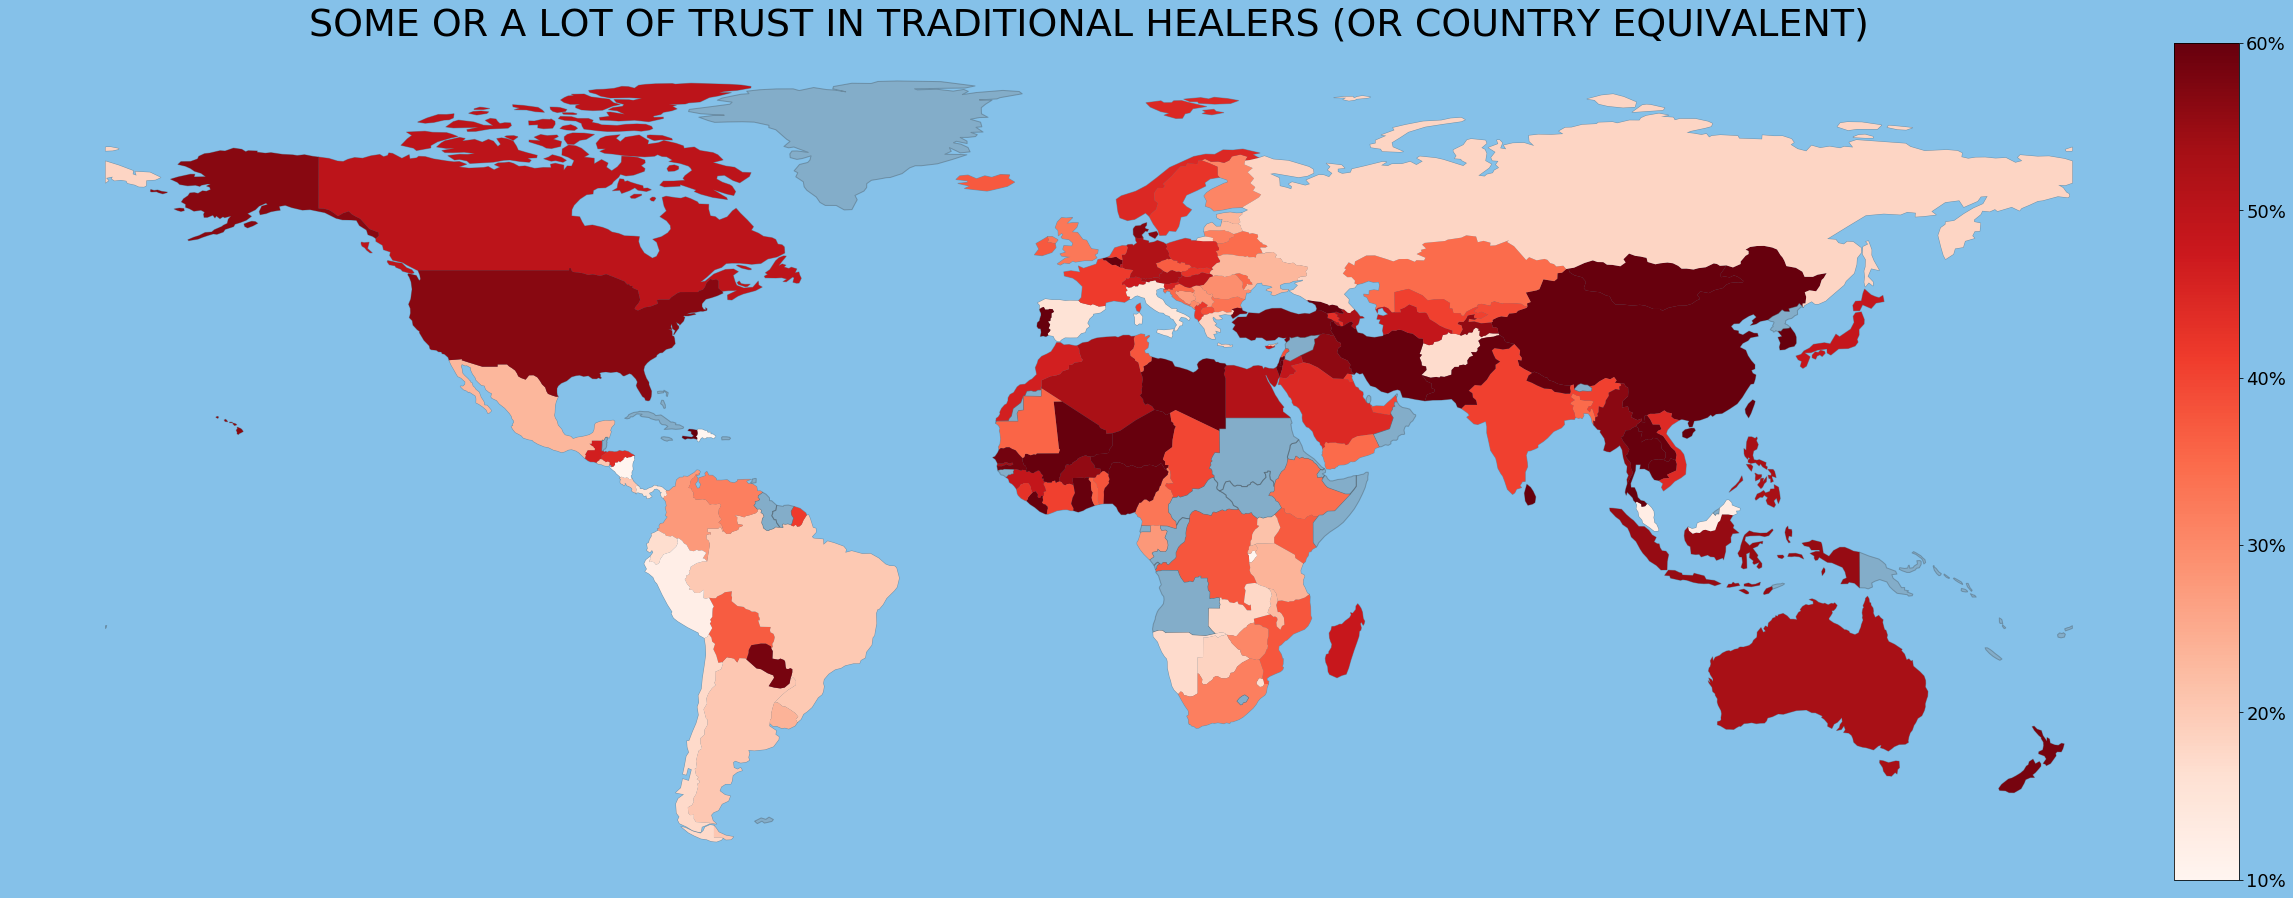

In [21]:
# Define max and mix for the colors
vmin=0.1
vmax=0.6

# load maps and remove antarctic
df_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_map = df_map[~df_map.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]

# build a dataframe with the selected field
#df_item = df_vac.filter(items=['Country','Agree']).copy()
df_map = df_map.merge(df_item, how='left',left_on = 'name', right_on = 'Country')
# set figure, axis and bg color
fig, ax = plt.subplots(1,1,figsize=(40,20))
fig.patch.set_facecolor('#85C1E9')

# plot a background map
df_map.plot(ax=ax, color='grey', alpha=0.3, edgecolor='0.2')

# drop not listed countries and plot colormap
df_map.dropna(inplace=True)
df_map.plot(column='Total', cmap='Reds', ax=ax, vmin=vmin, vmax=vmax)
# title
plt.title('Some or a lot of trust in traditional healers (or country equivalent)'.upper(), fontsize='38')

# set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%', '60%'])
cbar.ax.tick_params(labelsize=18)

# hide map axis
ax.axis('off')
plt.savefig('1.png', facecolor=fig.get_facecolor(), edgecolor='none')